In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('gld_price_data.csv')

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df.shape

(2290, 6)

In [ ]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Text(0.5, 1.0, 'Kolerasi Fitur Tabel')

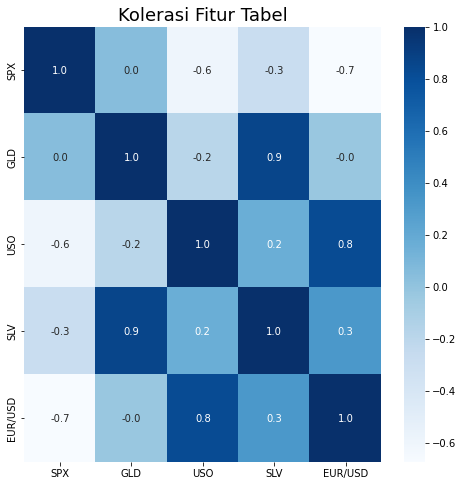

In [ ]:
corr = df.corr()
plt.figure(figsize =(8,8))
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, fmt=".1f", annot=True, cmap="Blues")
plt.title('Kolerasi Fitur Tabel', size=18)

In [ ]:
# Cek skor korelasi
print(corr['GLD'].sort_values(ascending=False))

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


Skewness:  0.3341383472692508
Kurtosis:  -0.2750805233458311


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


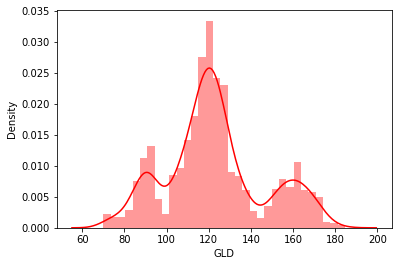

In [ ]:
# Cek Variabel Target
sb.distplot(df['GLD'], color = 'red')
print("Skewness: ", df['GLD'].skew())
print("Kurtosis: ", df['GLD'].kurt())

In [ ]:
kategori_fitur =[fitur for fitur in df.columns if ((df[fitur].dtypes == 'O') & (fitur not in ['GLD']))]
kategori_fitur

['Date']

In [ ]:
numerik_fitur = [fitur for fitur in df.columns if ((df[fitur].dtypes != 'O') & (fitur not in ['GLD']))]
print('Jumlah fitur Numerik =', len(numerik_fitur))
df[numerik_fitur].head()

Jumlah fitur Numerik = 4


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [ ]:
diskrit_fitur =[fitur for fitur in numerik_fitur if len (df[fitur].unique())<25]
print('Jumlah variabel diskrit: {}'.format(len(diskrit_fitur)))

Jumlah variabel diskrit: 0


In [ ]:
kontinu_fitur = [fitur for fitur in numerik_fitur if fitur not in diskrit_fitur+['GOD']]
print('Jumlah kontinu_fitur: {}'.format(len(kontinu_fitur)))

Jumlah kontinu_fitur: 4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

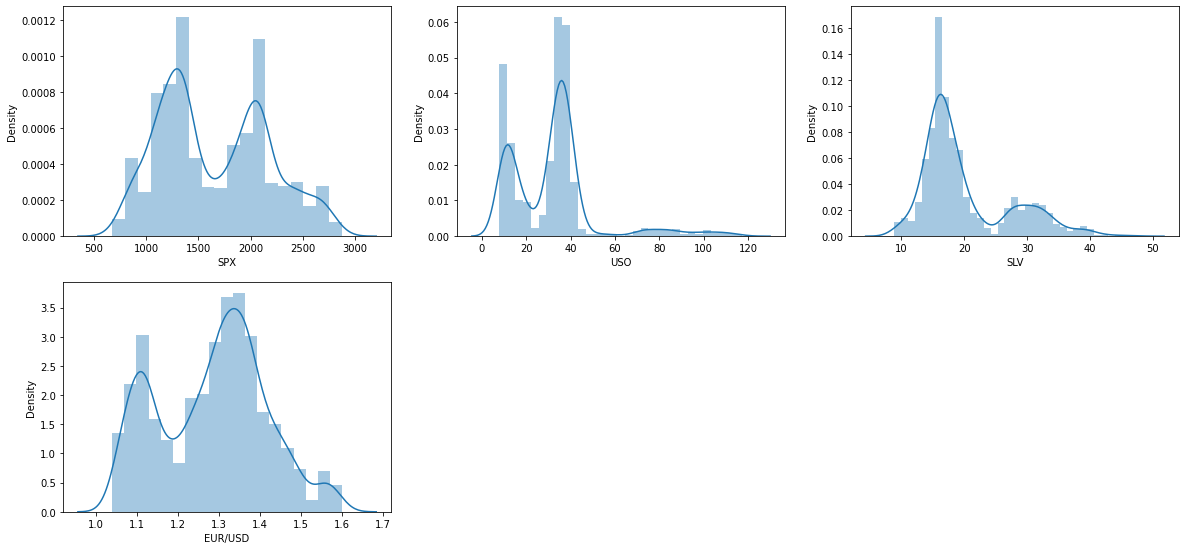

In [ ]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for kontinu_fiturs in kontinu_fitur:
  ax = plt.subplot(12,3, plotnumber)
  sb.distplot(df[kontinu_fiturs])
  plt.xlabel(kontinu_fiturs)
  plotnumber+=1
plt.show()

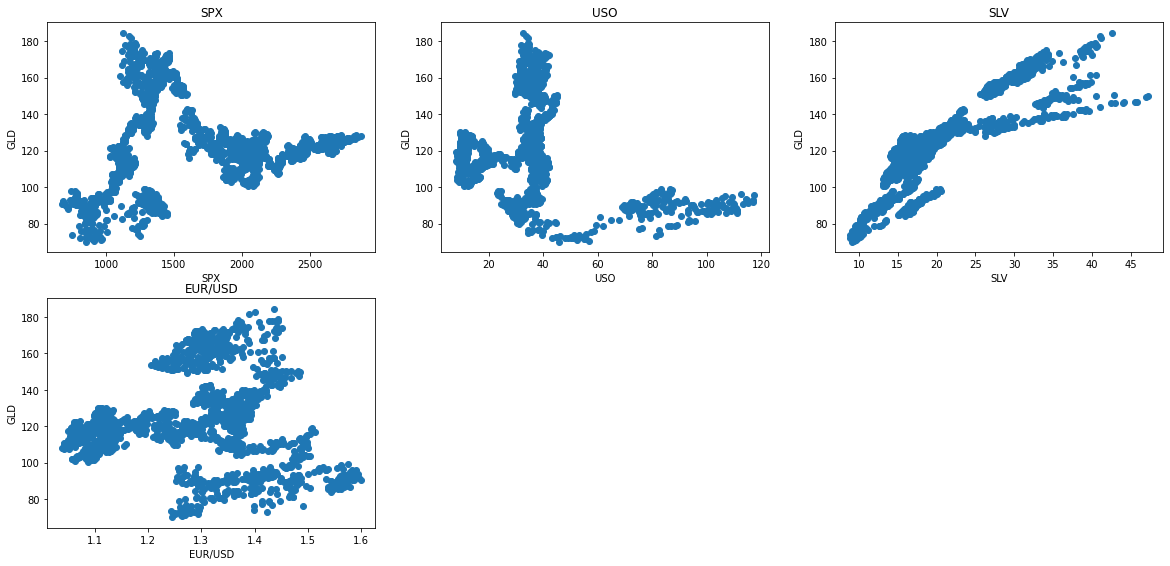

In [ ]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for fitur in kontinu_fitur:
  data=df.copy()
  ax = plt.subplot(12,3, plotnumber)
  plt.scatter(data[fitur],data['GLD'])
  plt.xlabel(fitur)
  plt.ylabel('GLD')
  plt.title(fitur)
  plotnumber+=1
plt.show()

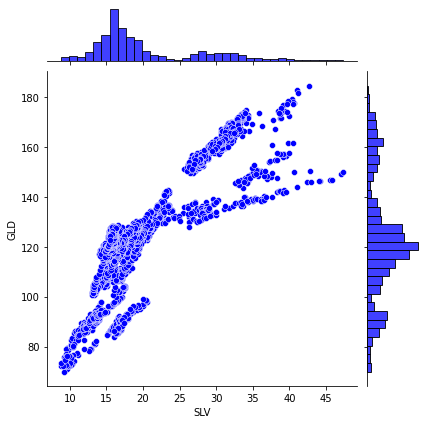

In [ ]:
# Cek relaso dengan GLD
sb.jointplot(x=df['SLV'],y=df['GLD'], color='Blue')

In [ ]:
x_matriks = df[['SPX','USO','SLV','EUR/USD']]
x =x_matriks.iloc[:,:].values
y = df.iloc[:,2].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#Now fitting the Random forest regression to the traning set
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor1.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
#Now predicting the test set result
y_pred = regressor1.predict(x_test)

In [ ]:
#Now Check the error for regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R Score :'," ",r2_score(y_test,y_pred))

MAE :   1.297793151724892
MSE :   5.16257387057774
RMAE :   2.272129809358994
R Score :   0.9899648553789232


In [ ]:
#Now Lets Check the Training and Test set Accuracy
accuracy_train = regressor1.score(x_train, y_train)
accuracy_test = regressor1.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9984324726699736
0.9899648553789232


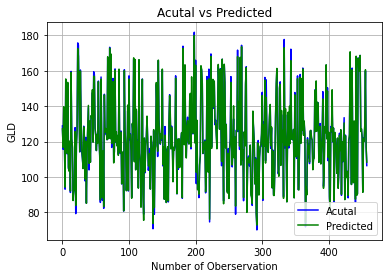

In [ ]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(y_pred, color = 'green', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(x_train,np.ravel(y_train))
dtr_pred = dtr.predict(x_test)

In [ ]:
print('MSE =', MSE(dtr_pred, y_test))
print('MAE =', MAE(dtr_pred, y_test))
print('R2 Score =', r2_score(dtr_pred, y_test))

MSE = 36.427791293497975
MAE = 4.393135487462744
R2 Score = 0.9290617510667954


In [ ]:
#Now Lets Check the Training and Test set Accuracy
accuracy_train = dtr.score(x_train, y_train)
accuracy_test = dtr.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9433330158130568
0.9291907170684719


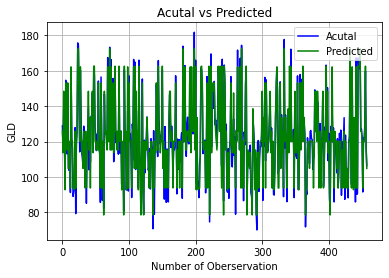

In [ ]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(dtr_pred, color = 'green', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=1000,max_depth=4,random_state=0)
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)

In [ ]:
print('MSE =', MSE(gbr_pred, y_test))
print('MAE =', MAE(gbr_pred, y_test))
print('R2 Score =', r2_score(gbr_pred, y_test))

MSE = 5.3544719802387775
MAE = 1.3997453361365093
R2 Score = 0.9896881976439893


In [ ]:
#Now Lets Check the Training and Test set Accuracy
accuracy_train = gbr.score(x_train, y_train)
accuracy_test = gbr.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9998054664753221
0.9895918388698647


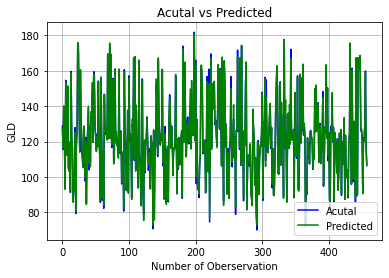

In [ ]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(gbr_pred, color = 'green', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(x_train,y_train)
ln_pred = ln.predict(x_test)

In [ ]:
print('MSE =', MSE(ln_pred, y_test))
print('MAE =', MAE(ln_pred, y_test))
print('R2 Score =', r2_score(ln_pred, y_test))

MSE = 75.61760337571633
MAE = 6.112232362039989
R2 Score = 0.8479378134183727


In [ ]:
#Now Lets Check the Training and Test set Accuracy
accuracy_train = ln.score(x_train, y_train)
accuracy_test = ln.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.8877758904855643
0.8530125466873725


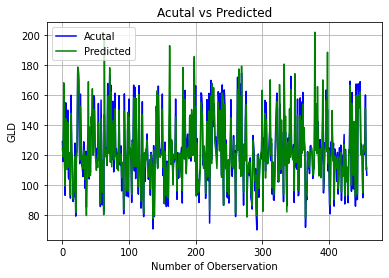

In [ ]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(ln_pred, color = 'green', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()